In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Tekstfiler/240416,oil.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

products = lines[0].strip().split(',')
stoffer_oil = np.array([float(num) for num in lines[1].strip().split()])

non_zero_indices = np.where(stoffer_oil != 0)[0]

stoffer_oil = stoffer_oil[non_zero_indices]
products = [products[i] for i in non_zero_indices]


Ai_tot = np.sum(stoffer_oil)
A_frac = stoffer_oil / Ai_tot

#print("Length of A_frac:", len(A_frac))

file_path_rf = 'Tekstfiler/Rf_liquid_analysis.txt'
with open(file_path_rf, 'r') as file:
    lines = file.readlines()

Rf_text = lines[0].strip().split(',')
Rf_values = np.array([float(num) for num in lines[1].strip().split(',')])

"""print("Rf_text:", Rf_text)
print("Length of Rf_text:", len(Rf_text))
print("Length of Rf_values:", len(Rf_values))"""

relevant_Rf_values = []

for product in products:
    match_found = False
    product = product.strip()  
    for i, text in enumerate(Rf_text):
        if product.lower() in text.lower(): 
            if i < len(Rf_values):  
                relevant_Rf_values.append(Rf_values[i])
            match_found = True
            break
    if not match_found:
        print(f"No match found for product: {product}") 

'''print("Length of relevant_Rf_values:", len(relevant_Rf_values))
print("Relevant Rf values:", relevant_Rf_values)'''

if len(A_frac) != len(relevant_Rf_values):
    print("Warning: Lengths of A_frac and relevant_Rf_values do not match.")

if len(A_frac) == len(relevant_Rf_values):
    Wr = relevant_Rf_values * A_frac
    print("Wr:", Wr)
else:
    print("Cannot calculate result due to length mismatch.")





Wr: [0.11882163 0.0003042  0.18906804 0.01141858 0.00123771 0.03878293
 0.00973656 0.00478107 0.00985964 0.00259824 0.00080682 0.00440333
 0.014304   0.00568878 0.01111773 0.00129912 0.0074802  0.03402327
 0.0603749  0.09103336 0.00235209 0.00124442 0.00421188 0.00216064
 0.00642723 0.03507857 0.01476894 0.0334546  0.0031117  0.00445855
 0.00270919 0.16298475 0.10727765 0.01901269 0.06792321 0.00750174
 0.0195166  0.03394651 0.00158487 0.00224901 0.05110303 0.040901  ]


In [2]:

Wr_tot = np.sum(Wr)

# Normalize Wr_array
Wr_normalised = Wr / Wr_tot

#############  ENDRE #############
vekt_prove = 2.7
#############  ENDRE #############
Wr_normalised[1] *= vekt_prove

weight_distribution = []
for row in Wr_normalised:
    weight_distribution.append([row])

max_lengths = [max(len(str(entry)) for entry in column) for column in weight_distribution]

print("Weight distribution in sample: ")
for name, row in zip(products, weight_distribution):
    print(f"{name}: {' | '.join(f'{entry:{max_lengths[i]}}' for i, entry in enumerate(row))}")


Weight distribution in sample: 
Pentanoic Acid: 0.09573749975312904
 2 cyclopenten 1 one: 0.0006617805270253557
 2 cyclopenten 1 one 2 methyl:  0.1523367507206034
 cyclohexanol 2 3 dimethyl: 0.009200231590961302
 2 cyclopenten 1 one 3 methyl: 0.0009972547947540698
 Phenol: 0.031248356359032517
 1 2 Cyclopentanedione 3 methyl: 0.007844987895526283
 Phenol 2 methyl: 0.003852226672252015
 P Cresol: 0.007944152068362992
 Cyclohexene 1 ethyl: 0.0020934658709971824
 Phenol 2 methoxy: 0.0006500762441517567
 Phenol 2 6 dimethyl: 0.0035478737392689095
 Phenol 2 ethyl: 0.011525080531910804
 Phenol 2 5 dimethyl: 0.004583588433341199
 1H indene 3 methyl: 0.008957830279582682
 Phenol 4 ethyl: 0.0010467329354985912
 Phenol 2 3 dimethyl: 0.006026978060186626
 Naphthalene: 0.027413384668636794
 Phenol 3 5 dimethyl: 0.04864553589711874
 Catechol: 0.07334780950084249
 Phenol 2 3 5 trimethyl: 0.0018951375253237653
 Benzofuran 2 3 dihydro: 0.0010026599697933875
 Phenol 3 ethyl 5 methyl: 0.0033936183593006

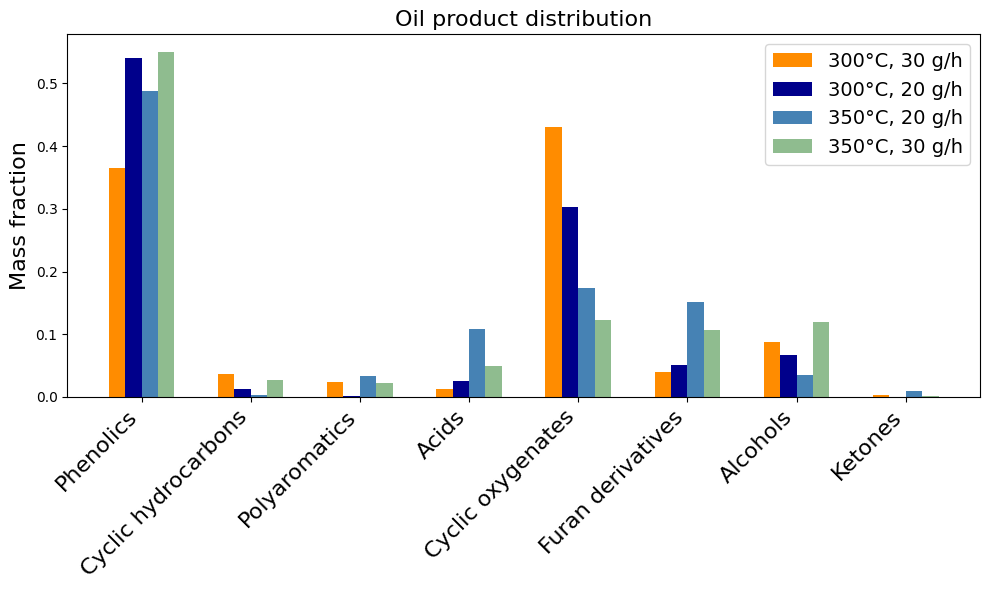

In [5]:
products = ["Phenolics", "Cyclic hydrocarbons", "Polyaromatics",  "Acids", "Cyclic oxygenates", "Furan derivatives", "Alcohols", "Ketones"]



#values_no_catalyst = [0.02, 0, 0, 0.29, 0.09, 0.19, 0.20, 0.05, 0.07, 0.03]
#values_Ru = [0.06, 0, 0.01, 0.73, 0.13, 0.06, 0, 0.01, 0.01, 0]

values_oil_16 = [0.488118745, 0.002362293, 0.03297838,  0.108031373, 0.173023979, 0.152144549, 0.0344883, 0.008852381]
values_oil_19 = [0.550730131, 0.026797044, 0.021867539,   0.050141564, 0.12332149, 0.107441818, 0.11880027, 0.000900144]
values_oil_23 = [0.539986116, 0.013120796, 0.002256234,  0.02521347, 0.302195561, 0.050623432, 0.066331623, 0.000272769]
values_oil_25 = [0.365402584, 0.036987072, 0.024342606,   0.011984315, 0.430722438, 0.039208967, 0.087948275, 0.003403744]


#colors = ['#f5cfb6', '#f5c0b6', '#f99d9d', '#f57979', '#f7be99']

plt.figure(figsize=(10, 6))


bar_width = 0.15
r1 = [x - 1.5 * bar_width for x in range(len(products))]  
r2 = [x - 0.5 * bar_width for x in range(len(products))]  
r3 = [x + 0.5 * bar_width for x in range(len(products))]  
r4 = [x + 1.5 * bar_width for x in range(len(products))]  
#r5 = [x + 2.5 * bar_width for x in range(len(products))]
#r6 = [x - 2.5 * bar_width for x in range(len(products))]



#colors = ['darkblue','tomato','darkseagreen', 'darkorange','steelblue','mediumvioletred']
plt.bar(r1, values_oil_25, width=bar_width, color='darkorange', label='300\u00B0C, 30 g/h')
plt.bar(r2, values_oil_23, width=bar_width, color='darkblue', label='300\u00B0C, 20 g/h') 
plt.bar(r3, values_oil_16, width=bar_width, color='steelblue', label='350\u00B0C, 20 g/h')
plt.bar(r4, values_oil_19,  width=bar_width, color='darkseagreen', label='350\u00B0C, 30 g/h')



plt.title('Oil product distribution',fontsize=16)
plt.ylabel('Mass fraction',fontsize=16)

middle_positions = [x for x in range(len(products))]
plt.xticks(middle_positions, products, rotation=45, ha='right',fontsize=16)

plt.tight_layout()
plt.legend(fontsize=14)
plt.show()
